In [58]:
import numpy as np
import pandas as pd
from pathlib import Path
try:
    import seaborn as plt
except:
    from matplotlib import pyplot as plt

In [34]:
for area in test_area_nums:
    for strategy in query_strategies:
        results_file = base_dir / 'test{area}/{strategy}/fine_tune_test_results.csv'
        try:
            results = pd.read_csv(results_file)
        except:
            continue
        #for method in finetune_methods:
        #    print(results[method in results['method']])

NameError: name 'test_area_nums' is not defined

In [49]:
# %load offline-experiments.py


# In[4]:


get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
import sys, os, time


# In[3]:


get_ipython().system('ls /mnt/blobfuse/train-output/offline-active-learning/test1/random')


# In[ ]:


#mnt(/blobfuse/analysis/active-learning/test${i}/${strategy}/fine_tune_test_results.csv)

#where ${i} in 1, 2, 3, 4
#           ${strategy} is "random", "entropy", or "margin"


# In[59]:


test_areas = ["test1","test2","test3","test4"]
strategies = ["random", "entropy", "margin"]

dfs = []

for test_area in test_areas:
    for strategy in strategies:
        fn = "/mnt/blobfuse/train-output/offline-active-learning/%s/%s/fine_tune_test_results.csv" % (
            test_area, strategy
        )
        if os.path.exists(fn):
            try:
                df = pd.read_csv(fn)
                df["strategy"] = strategy
                df[" area"] = test_area
                dfs.append(df)
            except Exception as e:
                print(e, fn)
        else:
            print("%s does not exist" % (fn))
df = pd.concat(dfs)

# In[71]:
#print(df)

methods = [
    'last_k_layers_lr_0.010000_last_k_1',
    'last_k_layers_lr_0.005000_last_k_2',
    'last_k_layers_lr_0.001000_last_k_3',
    'group_params_lr_0.002500',
    'dropout_lr_0.200000_last_k_5',
]
num_points = 400
num_seeds = 5
test_area = "test1"

mean_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
std_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
#results[:] = np.nan

for i, test_area in enumerate(test_areas):
    for j, strategy in enumerate(strategies):
        for k, method_id in enumerate(methods):

            
            
            subset = df[
                (df[" area"] == test_area) &
                (df["strategy"] == strategy) &
                (df["method"] == method_id) &
                (df[" num_points"] == num_points)
            ]
            
            accs = np.array([float(x) for x in subset[' pixel_accuracy']])
            ious = np.array([float(x) for x in subset[' mean_IoU']])
            
            mean_results[i,j,k,0] = subset[' pixel_accuracy'].mean()
            mean_results[i,j,k,1] = subset[' mean_IoU'].mean()
            
            std_results[i,j,k,0] = subset[' pixel_accuracy'].std()
            std_results[i,j,k,1] = subset[' mean_IoU'].std()

# In[78]:



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
fine_tune_test_results.csv


In [75]:
##########################################
#### Generate LaTeX-ready table @ 400 pts 
##########################################

print(methods)
for j, strategy in enumerate(strategies):
    print(strategy, end=' & ')
    for k, method_id in enumerate(methods):
        subset = df[
            (df[" num_points"] == 400) &
            (df["strategy"] == strategy) &
            (df["method"] == method_id)
        ]
        
        
        print(round(subset[' pixel_accuracy'].mean(), 3), end=' & ')
        print(round(subset[' mean_IoU'].mean(), 3), end=' & ')
        
    print(' \\\\')



['last_k_layers_lr_0.010000_last_k_1', 'last_k_layers_lr_0.005000_last_k_2', 'last_k_layers_lr_0.001000_last_k_3', 'group_params_lr_0.002500', 'dropout_lr_0.200000_last_k_5']
random & 0.806 & 0.608 & 0.825 & 0.677 & 0.824 & 0.658 & 0.791 & 0.562 & 0.787 & 0.597 &  \\
entropy & 0.736 & 0.501 & 0.731 & 0.587 & 0.765 & 0.572 & 0.76 & 0.52 & 0.741 & 0.55 &  \\
margin & 0.811 & 0.608 & 0.834 & 0.701 & 0.832 & 0.685 & 0.793 & 0.58 & 0.785 & 0.601 &  \\


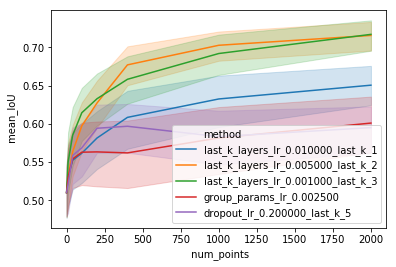

In [76]:
##########################################
#### Generate plot of mean IoU per fine tune method
##########################################

subset = df[ (df["strategy"] == 'random') ]
plt.lineplot(x=' num_points', y=' mean_IoU', hue='method', data=subset)




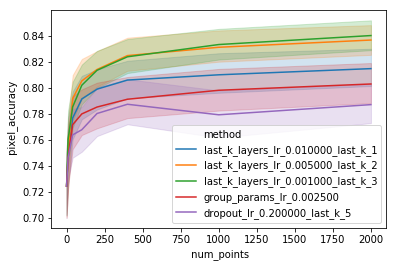

In [72]:
plt.lineplot(x=' num_points', y=' pixel_accuracy', hue='method', data=subset)

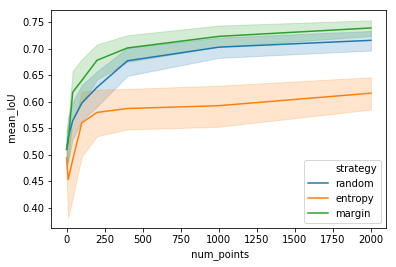

In [70]:
##########################################
#### Generate plot of mean IoU per query strategy
##########################################

subset = df[ (df["method"] == 'last_k_layers_lr_0.005000_last_k_2') ]
plt.lineplot(x=' num_points', y=' mean_IoU', hue='strategy', data=subset)

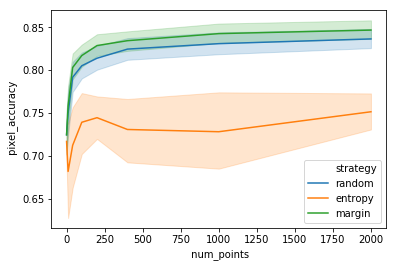

In [61]:
plt.lineplot(x=' num_points', y=' pixel_accuracy', hue='strategy', data=subset)